## Introduction

This study aims to identify variables which indicate if a person is likely to default, which can be used for identifying the risky loan applicants to avoid any financial loss to the company.

## Dataset Description

In [ ]:
# It contains the complete loan data for all loans issued through the time period 2007 to 2011.

## Data Dictionary

1.annual_inc - The self-reported annual income provided by the borrower during registration.

2.dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan,
divided by the borrower’s self-reported monthly income.

3.emp_length -Employment length in years. Possible values are between 0 and
10 where 0 means less than one year and 10 means ten or more years.

4.funded_amnt - The total amount committed to that loan at that point in
time.

5.funded_amnt_inv -The total amount committed by investors for that loan at
that point in time.

6.grade - LC assigned loan grade

7.id - A unique LC assigned ID for the loan listing.

8.installment - The monthly payment owed by the borrower if the loan
originates.

9.int_rate - Interest Rate on the loan

10.last_pymnt_amnt-Last total payment amount received

11.last_pymnt_d -Last month payment was received

12.loan_amnt -The listed amount of the loan applied for by the borrower. If at
some point in time, the credit department reduces the loan amount, then it
will be reflected in this value.

13.loan_status - Current status of the loan

14.member_id -A unique LC assigned Id for the borrower member.

15.purpose - A category provided by the borrower for the loan request.

16.term -The number of payments on the loan. Values are in months and can
be either 36 or 60.

17.total_acc -The total number of credit lines currently in the borrower's credit
file

18.total_pymnt -Payments received to date for total amount funded

19.total_pymnt_inv -Payments received to date for portion of total amount
funded by investors

20.total_rec_int -Interest received to date

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [40]:
# Import the dataset and understand it.

df = pd.read_csv('loan.csv')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,4 years,...,home_improvement,11.33,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,3 years,...,credit_card,6.40,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,< 1 year,...,debt_consolidation,2.30,5272.161128,1397.12,5000.00,272.16,Apr-08,0.00,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,< 1 year,...,other,3.72,5174.198551,672.66,5000.00,174.20,Jan-08,0.00,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  total_pymnt          39717 non-null 

In [41]:
# ‘Int_rate’ column is character type. let us convert into float type.

df['int_rate'] = df['int_rate'].apply(lambda x: float(x.strip('%')))

In [6]:
df['int_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


In [8]:
# Cleaning the dataset

df.isnull().sum()/len(df)*100

id                       0.000000
member_id                0.000000
loan_amnt                0.000000
funded_amnt              0.000000
funded_amnt_inv          0.000000
term                     0.000000
int_rate                 0.000000
installment              0.000000
grade                    0.000000
emp_length               2.706650
annual_inc               0.000000
verification_status      0.000000
loan_status              0.000000
purpose                  0.000000
dti                      0.000000
total_pymnt              0.000000
total_pymnt_inv          0.000000
total_rec_prncp          0.000000
total_rec_int            0.000000
last_pymnt_d             0.178765
last_pymnt_amnt          0.000000
Unnamed: 21            100.000000
Unnamed: 22            100.000000
dtype: float64

In [30]:
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1075
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
last_pymnt_d              71
last_pymnt_amnt            0
Unnamed: 21            39717
Unnamed: 22            39717
dtype: int64

In [ ]:
# columns Unnamed: 21 and Unnamed: 22 are having complete NaN values, column last payment date is not helpful for the analysis, let us drop them

In [42]:
df.drop(columns = ['Unnamed: 21','Unnamed: 22','last_pymnt_d'], inplace = True)

In [13]:
df.duplicated().sum()

0

In [11]:
# Target variable

df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [43]:
# let us consider the 'Fully Paid' and 'Charged Off' status for the analysis

df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]

In [44]:
# cleaning the ‘Emp_Len’ column to extract the numerical value from the string.

df['emp_length'] = df['emp_length'].apply(lambda x: int(''.join(filter(str.isdigit, str(x)))) if any(char.isdigit() for char in str(x)) else np.nan)
df['emp_length']

0        10.0
1         1.0
2        10.0
3        10.0
5         3.0
         ... 
39712     4.0
39713     3.0
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 38577, dtype: float64

In [45]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mean())

In [47]:
# cleaning the ‘term’ column such that ‘36 months’, ‘60 months’ appear as 36 and 60 respectively.

df['term'] = df['term'].apply(lambda x: int(''.join(filter(str.isdigit, str(x)))))

In [48]:
# Creating a new column as risky_loan_applicant by comparing loan_amnt and funded_amnt with the following criteria -
# If loan_amnt is less than equals to funded_amnt set it as ‘0’ else set it as ‘1’.

def risky(row):
    if row['loan_amnt'] <= row['funded_amnt']:
        return 0
    else:
        return 1
df['risky_loan_applicant'] = df.apply(risky, axis = 1)
df['risky_loan_applicant']

0        0
1        0
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: risky_loan_applicant, Length: 38577, dtype: int64

<Axes: xlabel='loan_status'>

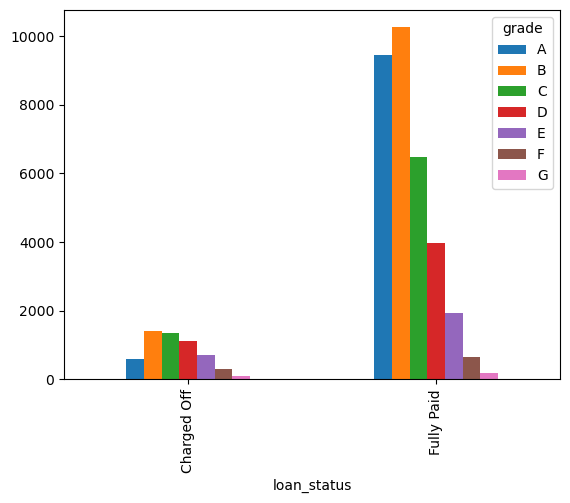

In [18]:
# Using the bar plot visualizing the loan_status column against categorical column grade, term.

lg = pd.crosstab(df['loan_status'],df['grade'])
lg.plot(kind = 'bar')

Inference can be made that most of the people fall into the category of loan status Fully Paid, and this category is dominated by the B group followed by A and C.

<Axes: xlabel='loan_status'>

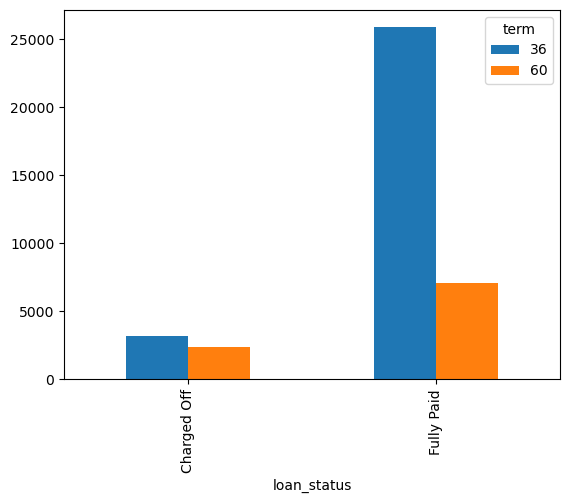

In [19]:
lt = pd.crosstab(df['loan_status'],df['term'])
lt.plot(kind = 'bar')

people in the category Fully Paid and Charged Off have preferred 36 months term more compared to 60 months.

In [49]:
# Using a user defined function convert the ‘emp_len’ column into categorical column as follows -
# If emp_len is less than equals to 1 then recode as ‘fresher’.
# If emp_len is greater than 1 and less than 3 then recode as ‘junior’.
# If emp_len is greater than 3 and less than 7 then recode as ‘senior’
# If emp_len is greater than 7 then recode as ‘expert’.

def exp(a):
    if a <= 1:
        return 'fresher'
    if a > 1 and a <= 3:
        return 'junior'
    if a > 3 and a <= 7:
        return 'senior'
    else:
        return 'expert'
    
df['emp_len_cat'] = df['emp_length'].apply(exp)
df['emp_len_cat']

0         expert
1        fresher
2         expert
3         expert
5         junior
          ...   
39712     senior
39713     junior
39714    fresher
39715    fresher
39716    fresher
Name: emp_len_cat, Length: 38577, dtype: object

In [22]:
# displaying the distribution of ‘loan_amnt’ for each grade using a pie plot.

sla = df.groupby('grade')['loan_amnt'].sum()
sla

grade
A     86575425
B    127663600
C     84728775
D     61720550
E     41756150
F     17660950
G      6055650
Name: loan_amnt, dtype: int64

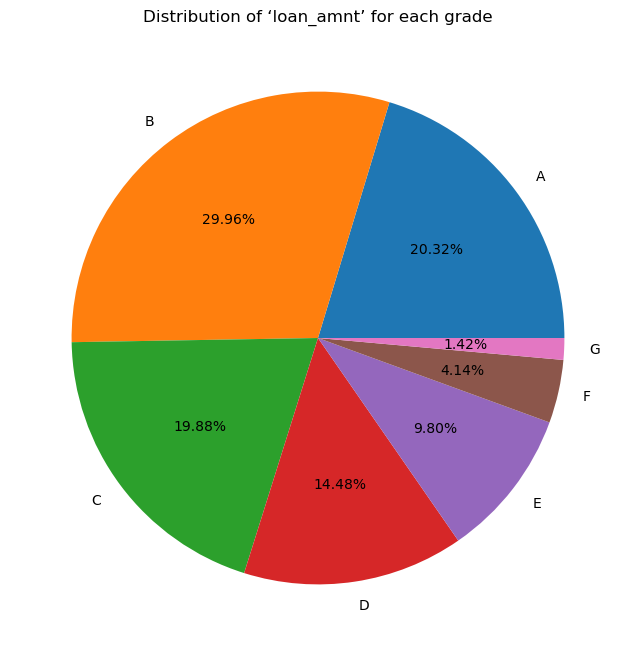

In [24]:
plt.figure(figsize = (8,8))
plt.pie(sla, autopct = '%1.2f%%', labels = sla.index)
plt.title('Distribution of ‘loan_amnt’ for each grade')
plt.show()

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,38577.0,676378.706561,209263.898488,54734.00,512033.000000,656423.000000,8.291460e+05,1.077501e+06
member_id,38577.0,842284.337429,264451.929349,70699.00,661131.000000,839292.000000,1.037336e+06,1.314167e+06
loan_amnt,38577.0,11047.025430,7348.441646,500.00,5300.000000,9600.000000,1.500000e+04,3.500000e+04
funded_amnt,38577.0,10784.058506,7090.306027,500.00,5200.000000,9550.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,38577.0,10222.481123,7022.720644,0.00,5000.000000,8733.440000,1.400000e+04,3.500000e+04
term,38577.0,41.898437,10.333136,36.00,36.000000,36.000000,3.600000e+01,6.000000e+01
int_rate,38577.0,11.932219,3.691327,5.42,8.940000,11.710000,1.438000e+01,2.440000e+01
installment,38577.0,322.466318,208.639215,15.69,165.740000,277.860000,4.255500e+02,1.305190e+03
emp_length,38577.0,5.061048,3.355895,1.00,2.000000,4.000000,9.000000e+00,1.000000e+01
annual_inc,38577.0,68777.973681,64218.681802,4000.00,40000.000000,58868.000000,8.200000e+04,6.000000e+06


In [55]:
df.drop(columns = ['id','member_id'], inplace= True)

In [54]:
df.select_dtypes(include= 'object').describe().T

,count,unique,top,freq
grade,38577,7,B,11675
verification_status,38577,3,Not Verified,16694
loan_status,38577,2,Fully Paid,32950
purpose,38577,14,debt_consolidation,18055
emp_len_cat,38577,4,senior,11448


In [56]:
for i in df.select_dtypes(include= 'object').columns:
    print(df[i].value_counts())
    print('-----------------------')

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64
-----------------------
verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64
-----------------------
loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64
-----------------------
purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64
-----------------------
emp_len_cat
senior     11448
expert     11149
junior      8303
fresher     7677
Name: count, dtype: int64
-----------------------


In [57]:
dfg = pd.get_dummies(df, drop_first= True, dtype= 'int')
dfg

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,total_pymnt,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,emp_len_cat_fresher,emp_len_cat_junior,emp_len_cat_senior
0,5000,5000,4975.0,36,10.65,162.87,10.0,24000.0,27.65,5863.155187,...,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,60,15.27,59.83,1.0,30000.0,1.00,1008.710000,...,0,0,0,0,0,0,0,1,0,0
2,2400,2400,2400.0,36,15.96,84.33,10.0,12252.0,8.72,3005.666844,...,0,0,0,0,1,0,0,0,0,0
3,10000,10000,10000.0,36,13.49,339.31,10.0,49200.0,20.00,12231.890000,...,0,0,1,0,0,0,0,0,0,0
5,5000,5000,5000.0,36,7.90,156.46,3.0,36000.0,11.20,5632.210000,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,4.0,110000.0,11.33,2822.969293,...,0,0,0,0,0,0,0,0,0,1
39713,8500,8500,875.0,36,10.28,275.38,3.0,18000.0,6.40,9913.491822,...,0,0,0,0,0,0,0,0,1,0
39714,5000,5000,1325.0,36,8.07,156.84,1.0,100000.0,2.30,5272.161128,...,0,0,0,0,0,0,0,1,0,0
39715,5000,5000,650.0,36,7.43,155.38,1.0,200000.0,3.72,5174.198551,...,0,0,1,0,0,0,0,1,0,0


In [58]:
from sklearn.model_selection import train_test_split

In [60]:
x = dfg.drop(columns = 'risky_loan_applicant')
y = dfg['risky_loan_applicant']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size= 0.8, random_state= 7, stratify= y)

In [61]:
from sklearn.linear_model import LogisticRegression
lt = LogisticRegression(class_weight = 'balanced', n_jobs= -1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs= -1)
from sklearn.naive_bayes import GaussianNB, MultinomialNB
gnb = GaussianNB()
mnb = MultinomialNB()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight = 'balanced')
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight = 'balanced', n_jobs= -1)
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(n_jobs= -1)
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs= -1)
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
from sklearn.ensemble import HistGradientBoostingClassifier
hist = HistGradientBoostingClassifier(class_weight = 'balanced')
from sklearn.metrics import classification_report, confusion_matrix
li = [lt,knn,gnb,mnb,dt,rf,ada,bg,et,gb,hist]

In [62]:
def model_validation(model, xtrain, ytrain, xtest, ytest):
    m = model
    m.fit(xtrain, ytrain)
    pred = m.predict(xtest)
    print(model)
    print('Confusion Matrix\n', confusion_matrix(ytest, pred))
    print('Classification Report\n', classification_report(ytest, pred))

In [63]:
for model in li:
    model_validation(model, xtrain, ytrain, xtest, ytest)

LogisticRegression(class_weight='balanced', n_jobs=-1)
Confusion Matrix
 [[7361    4]
 [   0  351]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7365
           1       0.99      1.00      0.99       351

    accuracy                           1.00      7716
   macro avg       0.99      1.00      1.00      7716
weighted avg       1.00      1.00      1.00      7716

KNeighborsClassifier(n_jobs=-1)
Confusion Matrix
 [[7363    2]
 [ 168  183]]
Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7365
           1       0.99      0.52      0.68       351

    accuracy                           0.98      7716
   macro avg       0.98      0.76      0.84      7716
weighted avg       0.98      0.98      0.97      7716

GaussianNB()
Confusion Matrix
 [[6750  615]
 [ 245  106]]
Classification Report
               precision    recall  f1-scor

In [ ]:
# Logistic regression is the best performing model